In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)

Mounted at /content/gdrive


In [2]:
from __future__ import annotations
import xml.etree.ElementTree as ET
import xml.dom.minidom as minidom
from pathlib import Path
from typing import NamedTuple
from typing import Optional
from PIL import Image
import gdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Image Width: 590 pixels
Image Height: 350 pixels


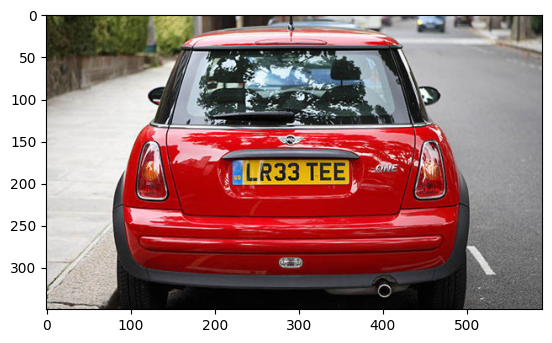

In [3]:
folder_dir = '/content/gdrive/MyDrive/Dataset'
spec_img = folder_dir + '/Car2.png'
image = mpimg.imread(spec_img)

img_width = image.shape[1]
img_height = image.shape[0]
print(f"Image Width: {img_width} pixels")
print(f"Image Height: {img_height} pixels")
plt.imshow(image)
plt.show()

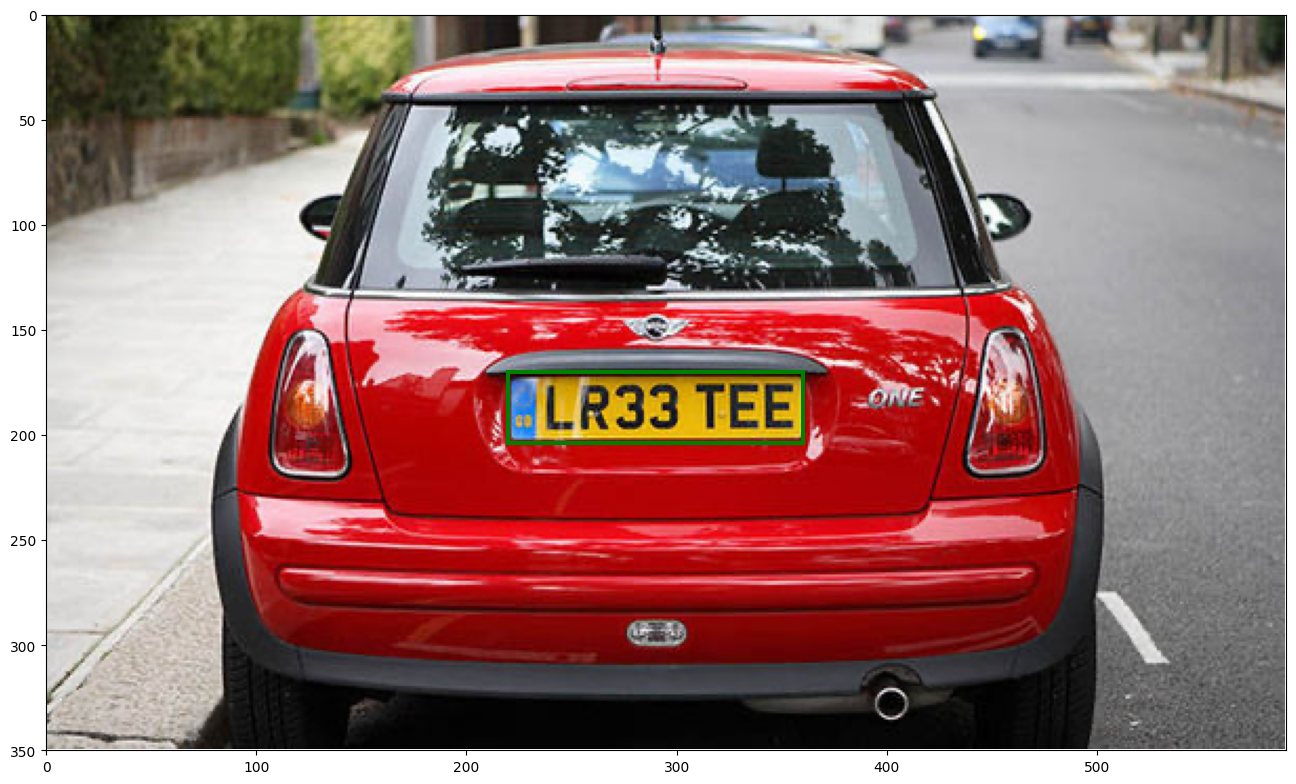

In [7]:
class BoundingBox(NamedTuple):
    x_min: float
    y_min: float
    x_max: float
    y_max: float

"""The following functions helps to display image and the bounding boxes on the various objects"""
def bbox_to_matplotlib_rect(bbox: BoundingBox, color: str):
    #Convert bounding box to matplotlib format.
    return plt.Rectangle(
        xy=(bbox.x_min, bbox.y_min),
        width=bbox.x_max - bbox.x_min,
        height=bbox.y_max - bbox.y_min,
        fill=False,
        edgecolor=color,
        linewidth=3,
    )

def add_box_to_figure(figure, bbox: BoundingBox, color: str):
    p = figure.axes.add_patch(bbox_to_matplotlib_rect(bbox, color))
    return p

def make_image_figure_with_bboxes(
    image: np.ndarray,
    bounding_boxes: list[BoundingBox],
):

    plt.figure(figsize=(16, 10))

    figure = plt.imshow(image)

    colors = ["green"] * len(bounding_boxes)

    #Here we add these anchor boxes we have
    for idx, c in enumerate(colors):
        patch = add_box_to_figure(figure, bounding_boxes[idx], c)

    plt.xlim((0, image.shape[1]))
    plt.ylim((image.shape[0], 0))
    plt.show()

"""we now use the pascal VOC format for the bunding boxes"""
#Image and the ground truth bounding boxes
filename = spec_img
np_image = np.array(Image.open(filename).convert("RGB"))

#we display only 1 box for now
gt_boxes = [
    BoundingBox(x_min=220, y_min=170, x_max=360, y_max=204),
]
make_image_figure_with_bboxes(np_image, gt_boxes)

In [10]:
"""now create the xml file for the image in brief we annotate"""
def create_annotation_xml(filename, width, height, class_name, xmin, ymin, xmax, ymax):
    # Create the root element
    annotation = ET.Element("annotation")

    # Create child elements
    folder = ET.SubElement(annotation, "folder")
    folder.text = "images"

    filename_elem = ET.SubElement(annotation, "filename")
    filename_elem.text = filename

    size = ET.SubElement(annotation, "size")
    width_elem = ET.SubElement(size, "width")
    width_elem.text = str(width)
    height_elem = ET.SubElement(size, "height")
    height_elem.text = str(height)
    depth_elem = ET.SubElement(size, "depth")
    depth_elem.text = "3"

    object_elem = ET.SubElement(annotation, "object")
    name = ET.SubElement(object_elem, "name")
    name.text = class_name

    pose = ET.SubElement(object_elem, "pose")
    pose.text = "Unspecified"

    truncated = ET.SubElement(object_elem, "truncated")
    truncated.text = "0"

    occluded = ET.SubElement(object_elem, "occluded")
    occluded.text = "0"

    difficult = ET.SubElement(object_elem, "difficult")
    difficult.text = "0"

    bndbox = ET.SubElement(object_elem, "bndbox")
    xmin_elem = ET.SubElement(bndbox, "xmin")
    xmin_elem.text = str(xmin)
    ymin_elem = ET.SubElement(bndbox, "ymin")
    ymin_elem.text = str(ymin)
    xmax_elem = ET.SubElement(bndbox, "xmax")
    xmax_elem.text = str(xmax)
    ymax_elem = ET.SubElement(bndbox, "ymax")
    ymax_elem.text = str(ymax)

    # Create a new ElementTree
    tree = ET.ElementTree(annotation)

    # Convert the ElementTree to a string
    xml_str = ET.tostring(annotation).decode()

    # Use minidom to format the XML with indentation
    dom = minidom.parseString(xml_str)
    formatted_xml = dom.toprettyxml()
    """Use minidom to format the XML with single-space indentation
    dom = minidom.parseString(xml_str)
    formatted_xml = dom.toprettyxml(indent=' ')"""

    # Write the formatted XML to a file
    """please mind the filename"""
    with open(folder_dir + '/Car2.xml', "w") as xml_file:
        xml_file.write(formatted_xml)
    print("XML file 'annotation.xml' has been created.")

filename = 'Car2.png'
width = img_width
height = img_height
class_name = "license"
for bbox in gt_boxes:
    xmin = bbox.x_min
    ymin = bbox.y_min
    xmax = bbox.x_max
    ymax = bbox.y_max

create_annotation_xml(filename, width, height, class_name, xmin, ymin, xmax, ymax)

XML file 'annotation.xml' has been created.
